In [1]:
include("../src/DistributedBaseStationClustering.jl")
using CoordinatedPrecoding, DistributedBaseStationClustering
using Compat, JLD

srand(7253242)

simulation_params = [
    "simulation_name" => "",
    "I" => 12, "Kc" => 2, "N" => 2, "M" => 8, "d" => 1,
    "Ndrops" => 1, "Nsim" => 5,
    "geography_size" => (1500.,1500.),
    "MS_serving_BS_distance" => Nullable(150.),
    "assignment_methods" => [
        BranchAndBoundClustering,
    ],
    "precoding_methods" => [ NoPrecoding, ],
    "aux_network_params" => [
        "num_coherence_symbols" => 2700,
        "beta_network_sdma" => 0.5,
    ],
    "aux_assignment_params" => [
        "BranchAndBoundClustering:max_abs_optimality_gap" => 0.,
        "BranchAndBoundClustering:max_rel_optimality_gap" => 0.,
        "BranchAndBoundClustering:E1_bound_in_rate_bound" => false,
    ],
    "aux_precoding_params" => [
        "initial_precoders" => "eigendirection",
        "stop_crit" => 1e-2,
        "max_iters" => 1000,
    ],
    "independent_variable" => (set_average_SNRs_dB!, [40]),
]
network =
    setup_random_large_scale_network(simulation_params["I"],
        simulation_params["Kc"], simulation_params["N"], simulation_params["M"],
        num_streams=simulation_params["d"],
        geography_size=simulation_params["geography_size"],
        MS_serving_BS_distance=simulation_params["MS_serving_BS_distance"])

raw_precoding_results, raw_assignment_results = simulate(network, simulation_params, loop_over=:assignment_methods)

INFO: Loading help data...


-- simulate on RandomLargeScaleNetwork(I = 12, Kc = 2, geography_size = (1500.0,1500.0), MS_serving_BS_distance = Nullable(150.0)).
--- Ndrops: 1, Nsim: 5.
Progress: 100%|█████████████████████████████████████████| Time: 0:00:05


(MultipleSimulationResults{4}(1x5x1x1 Array{SingleSimulationResults{T<:Results},4}:
[:, :, 1, 1] =
 SingleSimulationResults{PrecodingResults}(["BranchAndBoundClustering"=>PrecodingResults(["weighted_logdet_rates_partial"=>24x1 Array{Float64,2}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0,"objective"=>0.0,"utilities"=>24x1 Array{Float64,2}:
 2.21287e-314
 2.32331e-314
 6.934e-310  
 6.934e-310  
 6.93402e-310
 2.35436e-314
 2.35436e-314
 2.35436e-314
 2.21287e-314
 2.32331e-314
 6.93399e-310
 6.93399e-310
 6.93402e-310
 2.32929e-314
 2.32929e-314
 2.32929e-314
 2.21287e-314
 2.32344e-314
 6.93399e-310
 6.93399e-310
 6.93402e-310
 2.22043e-314
 2.22043e-314
 2.22043e-314,"allocated_power"=>24x1 Array{Float64,2}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0,"weighted_logdet_rates_full"=>24x1 Array{Float64,2}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 

In [2]:
Profile.clear()
@profile raw_precoding_results, raw_assignment_results = simulate(network, simulation_params, loop_over=:assignment_methods);

-- simulate on RandomLargeScaleNetwork(I = 12, Kc = 2, geography_size = (1500.0,1500.0), MS_serving_BS_distance = Nullable(150.0)).
--- Ndrops: 1, Nsim: 5.
Progress: 100%|█████████████████████████████████████████| Time: 0:00:05


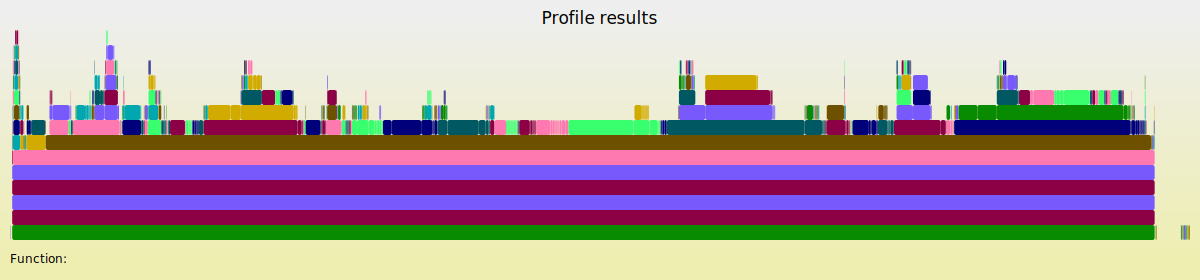

In [3]:
using ProfileView
ProfileView.view()